# Stock Prices Prediction Using Keras Long Term Short Memory

In [1]:
# Importing the Required libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Reading the Dataset and also getting the training dataset
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [3]:
# Getting some Infos on Dataset
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
Date                    2035 non-null object
Open                    2035 non-null float64
High                    2035 non-null float64
Low                     2035 non-null float64
Last                    2035 non-null float64
Close                   2035 non-null float64
Total Trade Quantity    2035 non-null int64
Turnover (Lacs)         2035 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [4]:
#Viewing the First 5 rows of the Dataset 
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [7]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the RNN

In [8]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [10]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [11]:

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [12]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))


In [13]:
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)



Epoch 1/250
1975/1975 [==============================] - 27s 13ms/step - loss: 0.0097
Epoch 2/250
1975/1975 [==============================] - 29s 15ms/step - loss: 0.0027
Epoch 3/250
1975/1975 [==============================] - 24s 12ms/step - loss: 0.0028
Epoch 4/250
1975/1975 [==============================] - 38s 19ms/step - loss: 0.0029
Epoch 5/250
1975/1975 [==============================] - 78s 40ms/step - loss: 0.0021
Epoch 6/250
1975/1975 [==============================] - 21s 11ms/step - loss: 0.0026
Epoch 7/250
1975/1975 [==============================] - 20s 10ms/step - loss: 0.0023
Epoch 8/250
1975/1975 [==============================] - 20s 10ms/step - loss: 0.0026
Epoch 9/250
1975/1975 [==============================] - 19s 10ms/step - loss: 0.0019
Epoch 10/250
1975/1975 [==============================] - 21s 11ms/step - loss: 0.0018
Epoch 11/250
1975/1975 [==============================] - 19s 10ms/step - loss: 0.0018
Epoch 12/250
1975/1975 [============================

1975/1975 [==============================] - 17s 9ms/step - loss: 7.0745e-04
Epoch 94/250
1975/1975 [==============================] - 18s 9ms/step - loss: 6.5861e-04
Epoch 95/250
1975/1975 [==============================] - 17s 9ms/step - loss: 6.4382e-04
Epoch 96/250
1975/1975 [==============================] - 17s 9ms/step - loss: 7.0637e-04
Epoch 97/250
1975/1975 [==============================] - 17s 9ms/step - loss: 6.3037e-04
Epoch 98/250
1975/1975 [==============================] - 17s 9ms/step - loss: 6.7253e-04
Epoch 99/250
1975/1975 [==============================] - 18s 9ms/step - loss: 6.4888e-04
Epoch 100/250
1975/1975 [==============================] - 18s 9ms/step - loss: 6.0636e-04
Epoch 101/250
1975/1975 [==============================] - 18s 9ms/step - loss: 6.6712e-04
Epoch 102/250
1975/1975 [==============================] - 18s 9ms/step - loss: 6.6977e-04
Epoch 103/250
1975/1975 [==============================] - 18s 9ms/step - loss: 6.4304e-04
Epoch 104/250
1975/

1975/1975 [==============================] - 18s 9ms/step - loss: 5.7212e-04
Epoch 183/250
1975/1975 [==============================] - 20s 10ms/step - loss: 5.3304e-04
Epoch 184/250
1975/1975 [==============================] - 18s 9ms/step - loss: 5.3053e-04
Epoch 185/250
1975/1975 [==============================] - 21s 11ms/step - loss: 6.0957e-04
Epoch 186/250
1975/1975 [==============================] - 20s 10ms/step - loss: 5.7555e-04
Epoch 187/250
1975/1975 [==============================] - 20s 10ms/step - loss: 5.3921e-04
Epoch 188/250
1975/1975 [==============================] - 19s 9ms/step - loss: 5.1580e-04
Epoch 189/250
1975/1975 [==============================] - 19s 10ms/step - loss: 5.9867e-04
Epoch 190/250
1975/1975 [==============================] - 22s 11ms/step - loss: 5.9001e-04
Epoch 191/250
1975/1975 [==============================] - 20s 10ms/step - loss: 5.3502e-04
Epoch 192/250
1975/1975 [==============================] - 21s 10ms/step - loss: 5.5331e-04
Epoch

# Making the predictions and visualising the results

In [14]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [15]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


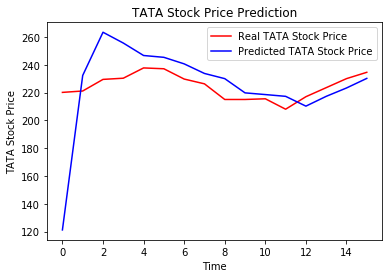

In [16]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()